Extracting EDF parameters from /mnt/e/ied_classification/eval/010/spsw_010_a_.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 293249  =      0.000 ...  1172.996 secs...
File loaded successfully!
[INFO] Applying 60Hz notch filter to remove power line interference...
[SUCCESS] 60Hz notch filter applied.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 825 samples (3.300 s)

Applied a 1-70 Hz band-pass filter.
<Info | 8 non-empty values
 bads: []
 ch_nam

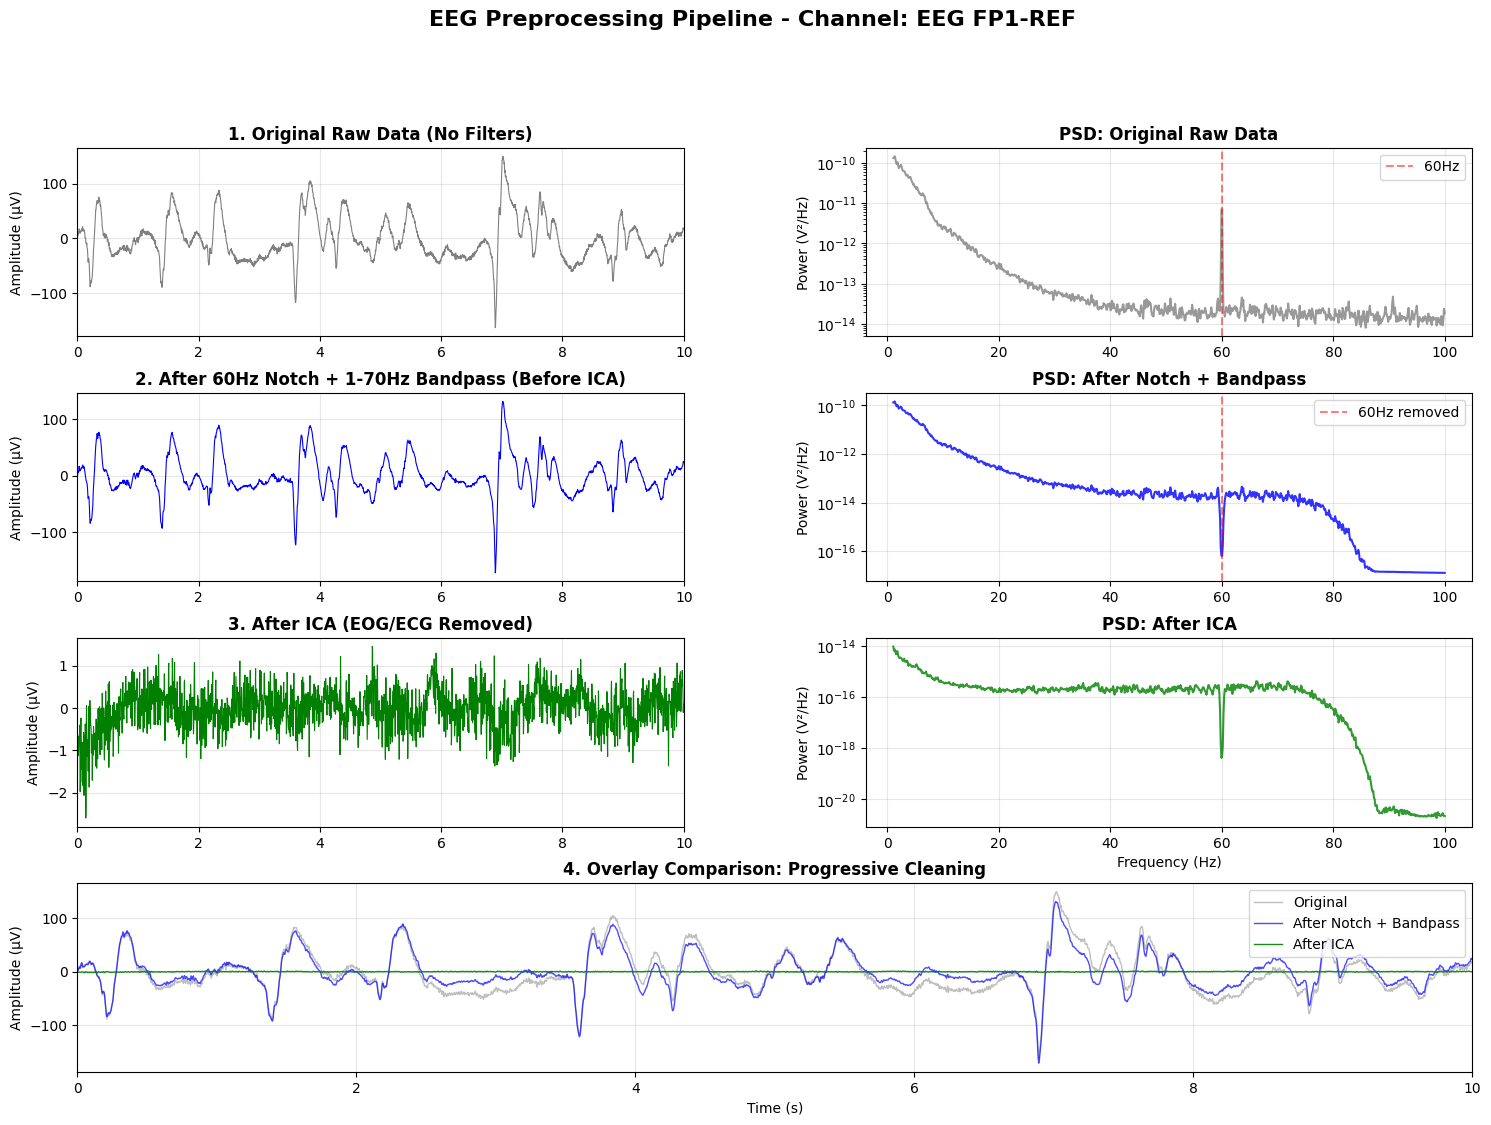

[SUCCESS] Filtering comparison visualization complete.
[INFO] 'cleaned_raw_data' is ready for IED detection.


In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import warnings

# Set Matplotlib to display plots inline in Jupyter Notebooks
%matplotlib inline

# ==============================================================================
# Available SPSW (Spike-and-Slow-Wave) Files with Ground Truth Annotations
# ==============================================================================
# Total: 40 SPSW files in the evaluation dataset
# Each .edf file has a corresponding .rec file with expert annotations
#
# Dataset IDs with SPSW patterns:
# 001, 002, 005, 008, 010, 012, 015, 017, 018, 020, 022, 023, 024, 032, 035,
# 037, 038, 040, 041, 043, 046 (x2), 047, 048, 049, 054, 058, 064, 067, 070,
# 072, 074, 077, 088, 089, 091, 093, 098 (x2), 099
#
# File path format: /mnt/e/ied_classification/eval/{ID}/spsw_{ID}_a_{suffix}.edf
# Examples:
#   - /mnt/e/ied_classification/eval/001/spsw_001_a_1.edf
#   - /mnt/e/ied_classification/eval/002/spsw_002_a_1.edf
#   - /mnt/e/ied_classification/eval/005/spsw_005_a_.edf  (current)
#   - /mnt/e/ied_classification/eval/008/spsw_008_a_.edf
#   - /mnt/e/ied_classification/eval/010/spsw_010_a_.edf
#   - /mnt/e/ied_classification/eval/012/spsw_012_a_3.edf
#   - /mnt/e/ied_classification/eval/015/spsw_015_a_2.edf
#   - ... (see full list below)
#
# Full list of available SPSW files:
# /mnt/e/ied_classification/eval/001/spsw_001_a_1.edf
# /mnt/e/ied_classification/eval/002/spsw_002_a_1.edf
# /mnt/e/ied_classification/eval/005/spsw_005_a_.edf
# /mnt/e/ied_classification/eval/008/spsw_008_a_.edf
# /mnt/e/ied_classification/eval/010/spsw_010_a_.edf
# /mnt/e/ied_classification/eval/012/spsw_012_a_3.edf
# /mnt/e/ied_classification/eval/015/spsw_015_a_2.edf
# /mnt/e/ied_classification/eval/017/spsw_017_a_2.edf
# /mnt/e/ied_classification/eval/018/spsw_018_a_1.edf
# /mnt/e/ied_classification/eval/020/spsw_020_a_6.edf
# /mnt/e/ied_classification/eval/022/spsw_022_a_.edf
# /mnt/e/ied_classification/eval/023/spsw_023_a_1.edf
# /mnt/e/ied_classification/eval/024/spsw_024_a_2.edf
# /mnt/e/ied_classification/eval/032/spsw_032_a_.edf
# /mnt/e/ied_classification/eval/035/spsw_035_a_.edf
# /mnt/e/ied_classification/eval/037/spsw_037_a_.edf
# /mnt/e/ied_classification/eval/038/spsw_038_a_.edf
# /mnt/e/ied_classification/eval/040/spsw_040_a_1.edf
# /mnt/e/ied_classification/eval/041/spsw_041_a_.edf
# /mnt/e/ied_classification/eval/043/spsw_043_a_.edf
# /mnt/e/ied_classification/eval/046/spsw_046_a_1.edf
# /mnt/e/ied_classification/eval/046/spsw_046_a_2.edf
# /mnt/e/ied_classification/eval/047/spsw_047_a_.edf
# /mnt/e/ied_classification/eval/048/spsw_048_a_1.edf
# /mnt/e/ied_classification/eval/049/spsw_049_a_1.edf
# /mnt/e/ied_classification/eval/054/spsw_054_a_1.edf
# /mnt/e/ied_classification/eval/058/spsw_058_a_.edf
# /mnt/e/ied_classification/eval/064/spsw_064_a_1.edf
# /mnt/e/ied_classification/eval/067/spsw_067_a_1.edf
# /mnt/e/ied_classification/eval/070/spsw_070_a_.edf
# /mnt/e/ied_classification/eval/072/spsw_072_a_1.edf
# /mnt/e/ied_classification/eval/074/spsw_074_a_.edf
# /mnt/e/ied_classification/eval/077/spsw_077_a_1.edf
# /mnt/e/ied_classification/eval/088/spsw_088_a_.edf
# /mnt/e/ied_classification/eval/089/spsw_089_a_.edf
# /mnt/e/ied_classification/eval/091/spsw_091_a_.edf
# /mnt/e/ied_classification/eval/093/spsw_093_a_.edf
# /mnt/e/ied_classification/eval/098/spsw_098_a_.edf
# /mnt/e/ied_classification/eval/098/spsw_098_a_1.edf
# /mnt/e/ied_classification/eval/099/spsw_099_a_.edf
# ==============================================================================

# File path - Change this to test different SPSW files
file_path = '/mnt/e/ied_classification/eval/005/spsw_005_a_.edf'
# tested on 005, 037, 038, 041, 070
# worked well for 005, 037, 038, 070

# Load the EDF file using MNE-Python
# preload=True loads the data into memory for easier processing
try:
    raw = mne.io.read_raw_edf(file_path, preload=True)
    raw_unfiltered = raw.copy()
    print("File loaded successfully!")
    
    # ========== IMPROVEMENT: Add 60Hz Notch Filter ==========
    # NECESSITY: Power line interference at 60Hz (USA) or 50Hz (Europe/Asia) is a
    # major source of noise in EEG recordings. Notch filtering removes this artifact
    # while preserving the neural signals of interest.
    # IFCN Best Practices recommend notch filtering before band-pass filtering.
    print("[INFO] Applying 60Hz notch filter to remove power line interference...")
    raw.notch_filter(freqs=60, picks='eeg', method='fir', fir_design='firwin', 
                     phase='zero', verbose=False)
    print("[SUCCESS] 60Hz notch filter applied.")
    
    # Apply a band-pass filter as recommended by the paper to remove DC offset and high-frequency noise
    raw.filter(l_freq=1.0, h_freq=70.0)
    print("Applied a 1-70 Hz band-pass filter.")
    # Print data information
    print(raw.info)
except Exception as e:
    print(f"Failed to load file: {e}")

# Rename legacy names: T3/T4/T5/T6 -> T7/T8/P7/P8 before montage
rename_map = {}
if "T3" in raw.ch_names: rename_map["T3"] = "T7"
if "T4" in raw.ch_names: rename_map["T4"] = "T8"
if "T5" in raw.ch_names: rename_map["T5"] = "P7"
if "T6" in raw.ch_names: rename_map["T6"] = "P8"
if len(rename_map):
    mne.rename_channels(raw.info, mapping=rename_map)
    print(f"[INFO] Renamed channels for montage: {rename_map}")

# Set channel types based on your list (EEG/EOG/ECG/EMG/MISC)
# LOC1/LOC2→EOG；EKGL/EKGR/ECG→ECG；EMG1/2→EMG；A1/A2/DC*/X*/OSAT/PR→misc；else→EEG
types_map = {}
for ch in raw.ch_names:
    u = ch.upper()
    if u in {"EKGL", "EKGR", "ECG"} or u.startswith("EKG"):
        types_map[ch] = "ecg"
    elif u in {"LOC1", "LOC2", "EOG", "VEOG", "HEOG"} or u.startswith("EOG"):
        types_map[ch] = "eog"
    elif u.startswith("EMG") or u in {"EMG1", "EMG2"}:
        types_map[ch] = "emg"
    elif u.startswith("DC") or u.startswith("X") or u in {"OSAT", "PR","A1","A2"}:
        types_map[ch] = "misc"
    else:
        types_map[ch] = "eeg"

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="The unit .* has changed from .* to NA")
    raw.set_channel_types(types_map)
print("[INFO] Channel types set:",
      {k: sum(v == k for v in types_map.values()) for k in ["eeg", "eog", "ecg", "emg", "misc"]})

# ========== 2) montage ==========
try:
    raw.set_montage("standard_1020", match_case=False, on_missing="ignore")
    print("[INFO] Montage set: standard_1020")
except Exception as e:
    print(f"[WARN] Montage issue: {e}")

# ========== 3) ICA ==========
picks_eeg = mne.pick_types(raw.info, eeg=True, eog=False, ecg=False, emg=False, misc=False)
if len(picks_eeg) == 0:
    raise RuntimeError("No EEG channels picked for ICA.")

print("[INFO] Preparing data for ICA (EEG only, 1–40 Hz) ...")
raw_for_ica = raw.copy().filter(l_freq=1.0, h_freq=40.0, picks=picks_eeg,
                                phase="zero", fir_design="firwin", verbose=True)

# Save raw before ICA for comparison plotting
raw_before_ica = raw.copy()

# ========== 4) FITTING ICA ==========
try:
    import picard  # noqa: F401
    ica_method = "picard"
except Exception:
    ica_method = "fastica"

n_eeg = len(picks_eeg)
fit_params = None
if ica_method == "fastica":
    # For MNE 1.9.0, pass sklearn FastICA kwargs via fit_params
    fit_params = dict(tol=5e-4)

print(f"[INFO] Fitting ICA with method={ica_method} ...")
ica = mne.preprocessing.ICA(
    n_components=min(n_eeg, 40),  # 32–40）
    method=ica_method,
    random_state=97,
    max_iter=1000,               
    fit_params=fit_params,
    verbose=True
)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)
    ica.fit(raw_for_ica, picks=picks_eeg, decim=2, reject_by_annotation=True)

print(f"[INFO] ICA fitted. n_components_={ica.n_components_}")

# ========== 5) EOG/ECG ==========
def choose_eog_ref(inst: mne.io.BaseRaw):
    for nm in ["LOC1", "LOC2"]:
        if nm in inst.ch_names:
            return nm
    if "Fp1" in inst.ch_names and "Fp2" in inst.ch_names:
        new_name = "EOG-Fp1-Fp2"
        if new_name not in inst.ch_names:
            mne.set_bipolar_reference(inst, anode="Fp1", cathode="Fp2",
                                      ch_name=new_name, drop_refs=False, copy=False)
            inst.set_channel_types({new_name: "eog"})
            print(f"[INFO] Created bipolar EOG: {new_name} = Fp1 - Fp2")
        return new_name
    return None

eog_ch = choose_eog_ref(raw)
bads_eog = []
if eog_ch is not None:
    try:
        bads_eog, scores_eog = ica.find_bads_eog(raw, ch_name=eog_ch, measure="correlation")
        print(f"[INFO] EOG components (candidate): {bads_eog}")
    except Exception as e:
        print(f"[WARN] find_bads_eog failed: {e}")
else:
    print("[INFO] No EOG reference available; skipping EOG detection.")

# ECG: prefer EKGL/EKGR/ECG if present
ecg_ch = None
for nm in ["EKGL", "EKGR", "ECG"]:
    if nm in raw.ch_names:
        ecg_ch = nm
        break

bads_ecg = []
try:
    bads_ecg, scores_ecg = ica.find_bads_ecg(raw, ch_name=ecg_ch, method="correlation")
    print(f"[INFO] ECG components (candidate): {bads_ecg}")
except Exception as e:
    print(f"[WARN] find_bads_ecg failed: {e}")

ica.exclude = sorted(set(ica.exclude).union(bads_eog).union(bads_ecg))
print(f"[INFO] ICA exclude list: {ica.exclude}")

# ========== 6) apply ICA、set average ==========
print("[INFO] Applying ICA to raw ...")
raw_ica_clean = raw.copy()
ica.apply(raw_ica_clean)
print("[INFO] Setting average EEG reference ...")
raw_ica_clean.set_eeg_reference("average", projection=False)

final_cleaned_raw = raw_ica_clean
print("[SUCCESS] ICA applied. final_cleaned_raw is ready.")

# ==============================================================================
# IMPROVEMENT: Visualization of Filtering Effects
# ==============================================================================
print("\n" + "=" * 80)
print("VISUALIZATION: Before vs After Filtering & ICA")
print("=" * 80)

channel_to_plot = 'EEG FP1-REF'
plot_duration = 10  # seconds
f_min_psd = 1.0
f_max_psd = 100.0

# Create comparison plots
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(4, 2, hspace=0.3, wspace=0.3)

# --- Row 1: Time Domain - Before Bandpass Filter ---
ax1 = fig.add_subplot(gs[0, 0])
data_unfilt, times = raw_unfiltered.get_data(picks=channel_to_plot, return_times=True)
t_end_idx = np.searchsorted(times, plot_duration)
ax1.plot(times[:t_end_idx], data_unfilt[0, :t_end_idx] * 1e6, color='gray', linewidth=0.8)
ax1.set_title('1. Original Raw Data (No Filters)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Amplitude (µV)')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, plot_duration)

# --- Row 1: PSD - Before Bandpass Filter ---
ax2 = fig.add_subplot(gs[0, 1])
psd_unfilt, freqs_unfilt = raw_unfiltered.compute_psd(
    fmin=f_min_psd, fmax=f_max_psd, picks=channel_to_plot
).get_data(return_freqs=True)
ax2.semilogy(freqs_unfilt, psd_unfilt[0], color='gray', linewidth=1.5, alpha=0.8)
ax2.set_title('PSD: Original Raw Data', fontsize=12, fontweight='bold')
ax2.set_ylabel('Power (V²/Hz)')
ax2.grid(True, alpha=0.3)
ax2.axvline(60, color='red', linestyle='--', alpha=0.5, label='60Hz')
ax2.legend()

# --- Row 2: Time Domain - After Bandpass & Notch Filter, Before ICA ---
ax3 = fig.add_subplot(gs[1, 0])
data_filt, _ = raw_before_ica.get_data(picks=channel_to_plot, return_times=True)
ax3.plot(times[:t_end_idx], data_filt[0, :t_end_idx] * 1e6, color='blue', linewidth=0.8)
ax3.set_title('2. After 60Hz Notch + 1-70Hz Bandpass (Before ICA)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Amplitude (µV)')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, plot_duration)

# --- Row 2: PSD - After Bandpass & Notch Filter, Before ICA ---
ax4 = fig.add_subplot(gs[1, 1])
psd_filt, freqs_filt = raw_before_ica.compute_psd(
    fmin=f_min_psd, fmax=f_max_psd, picks=channel_to_plot
).get_data(return_freqs=True)
ax4.semilogy(freqs_filt, psd_filt[0], color='blue', linewidth=1.5, alpha=0.8)
ax4.set_title('PSD: After Notch + Bandpass', fontsize=12, fontweight='bold')
ax4.set_ylabel('Power (V²/Hz)')
ax4.grid(True, alpha=0.3)
ax4.axvline(60, color='red', linestyle='--', alpha=0.5, label='60Hz removed')
ax4.legend()

# --- Row 3: Time Domain - After ICA ---
ax5 = fig.add_subplot(gs[2, 0])
data_ica, _ = raw_ica_clean.get_data(picks=channel_to_plot, return_times=True)
ax5.plot(times[:t_end_idx], data_ica[0, :t_end_idx] * 1e6, color='green', linewidth=0.8)
ax5.set_title('3. After ICA (EOG/ECG Removed)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Amplitude (µV)')
ax5.grid(True, alpha=0.3)
ax5.set_xlim(0, plot_duration)

# --- Row 3: PSD - After ICA ---
ax6 = fig.add_subplot(gs[2, 1])
psd_ica, freqs_ica = raw_ica_clean.compute_psd(
    fmin=f_min_psd, fmax=f_max_psd, picks=channel_to_plot
).get_data(return_freqs=True)
ax6.semilogy(freqs_ica, psd_ica[0], color='green', linewidth=1.5, alpha=0.8)
ax6.set_title('PSD: After ICA', fontsize=12, fontweight='bold')
ax6.set_ylabel('Power (V²/Hz)')
ax6.set_xlabel('Frequency (Hz)')
ax6.grid(True, alpha=0.3)

# --- Row 4: Overlay Comparison (Time Domain) ---
ax7 = fig.add_subplot(gs[3, :])
ax7.plot(times[:t_end_idx], data_unfilt[0, :t_end_idx] * 1e6, 
         color='gray', linewidth=1.0, alpha=0.5, label='Original')
ax7.plot(times[:t_end_idx], data_filt[0, :t_end_idx] * 1e6, 
         color='blue', linewidth=1.0, alpha=0.7, label='After Notch + Bandpass')
ax7.plot(times[:t_end_idx], data_ica[0, :t_end_idx] * 1e6, 
         color='green', linewidth=1.0, alpha=0.9, label='After ICA')
ax7.set_title('4. Overlay Comparison: Progressive Cleaning', fontsize=12, fontweight='bold')
ax7.set_xlabel('Time (s)')
ax7.set_ylabel('Amplitude (µV)')
ax7.legend(loc='upper right')
ax7.grid(True, alpha=0.3)
ax7.set_xlim(0, plot_duration)

fig.suptitle(f'EEG Preprocessing Pipeline - Channel: {channel_to_plot}', 
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

print("[SUCCESS] Filtering comparison visualization complete.")
print("=" * 80)

# Set cleaned_raw_data for downstream cells
cleaned_raw_data = final_cleaned_raw
print("[INFO] 'cleaned_raw_data' is ready for IED detection.")

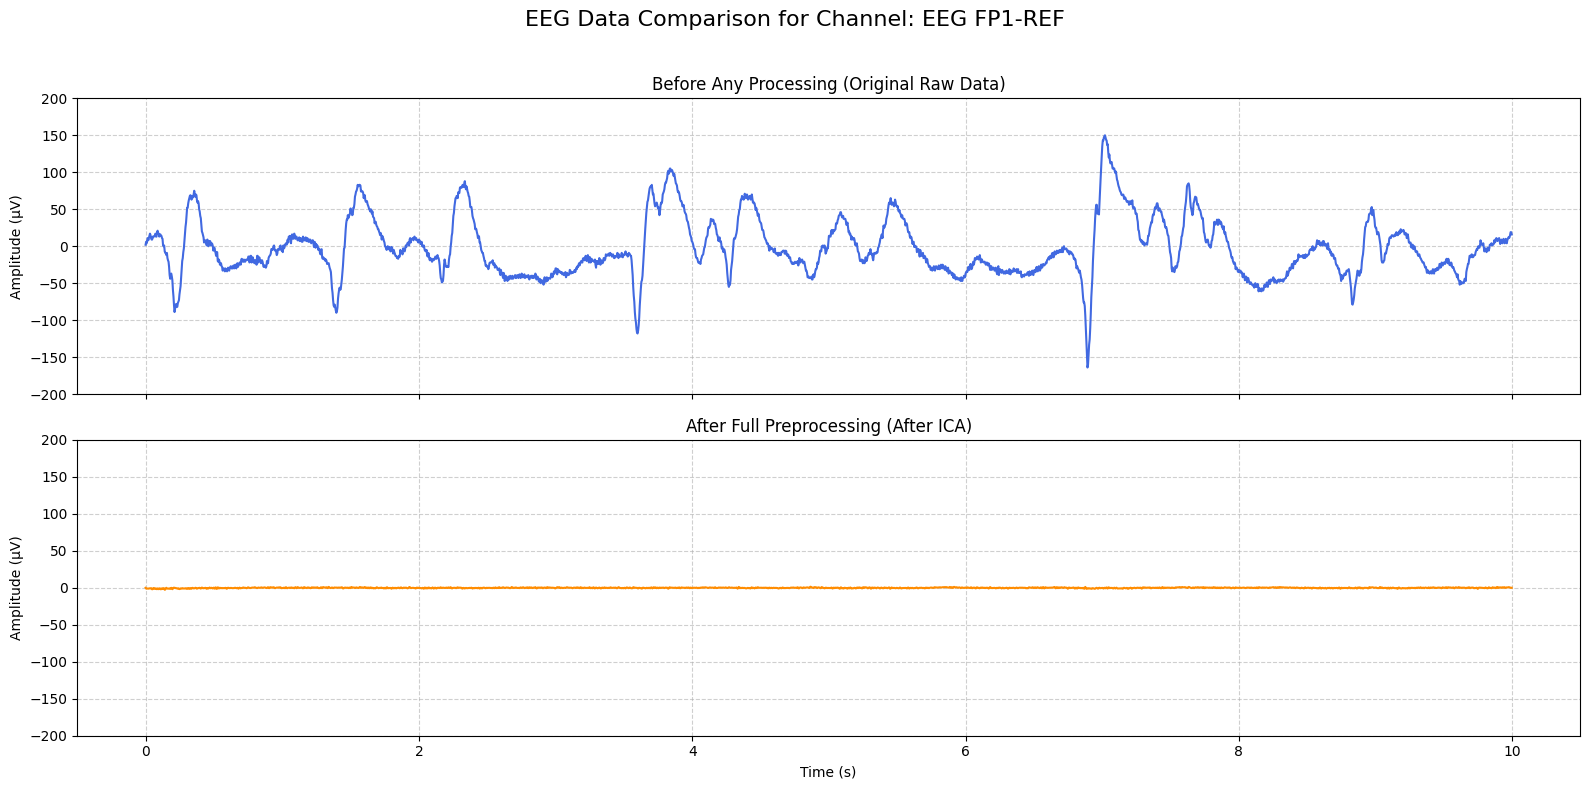

[INFO] Plotted comparison using: After ICA


: 

In [ ]:
# ==============================================================================
# Block for Plotting: Comparing Raw Data vs. Fully Processed Data
# ==============================================================================

# --- Parameters for plotting ---
channel_to_plot = 'EEG FP1-REF' 
plot_duration_s = 10
# -----------------------------

# Extract data for the chosen channel from both raw and final objects
# The data is returned in Volts, so we multiply by 1e6 to get microvolts (uV)
unfiltered_data, times_plot = raw_unfiltered.get_data(picks=channel_to_plot, return_times=True)
unfiltered_data_uV = unfiltered_data.flatten() * 1e6

# Use cleaned_raw_data (after ICA)
fully_processed_data, _ = cleaned_raw_data.get_data(picks=channel_to_plot, return_times=True)
fully_processed_data_uV = fully_processed_data.flatten() * 1e6
processing_stage = "After ICA"

# Find the time index for the desired duration
t_end_idx = np.searchsorted(times_plot, plot_duration_s)

# Create the plot
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
fig.suptitle(f'EEG Data Comparison for Channel: {channel_to_plot}', fontsize=16)

# Plot 1: Before any processing
axes[0].plot(times_plot[:t_end_idx], unfiltered_data_uV[:t_end_idx], color='royalblue')
axes[0].set_title('Before Any Processing (Original Raw Data)')
axes[0].set_ylabel('Amplitude (µV)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].set_ylim(-200, 200)

# Plot 2: After all preprocessing
axes[1].plot(times_plot[:t_end_idx], fully_processed_data_uV[:t_end_idx], color='darkorange')
axes[1].set_title(f'After Full Preprocessing ({processing_stage})')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Amplitude (µV)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_ylim(-200, 200)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(f"[INFO] Plotted comparison using: {processing_stage}")


Morphology: Di- or tri-phasic waves with a pointed peak, distinguishing them from background activity.

Duration: The wave's duration is different from the ongoing background activity, being either shorter or longer.

Asymmetry: The waveform is asymmetrical, with a sharply rising phase and a more slowly decaying phase, or vice-versa.

After-wave: The transient is followed by an associated slow after-wave.

Background Disruption: The surrounding background activity is disrupted by the presence of the IED.

Voltage Map: The distribution of potentials on the scalp suggests a signal source originating within the brain.

In [ ]:
import pandas as pd
from scipy.signal import find_peaks, peak_widths

# ==============================================================================
# IED Detection with IFCN Criteria Scoring & Merging
# ==============================================================================
# This block implements a scoring system based on the Kural et al. (2020) paper.
# ==============================================================================

# ==============================================================================
# Enhanced Duration Check (20-200ms IFCN Criteria)
# ==============================================================================
# Kural et al. (2020) found that enforcing IFCN duration criteria
# (spikes: 20-70ms, sharp waves: 70-200ms) improved specificity by +12%.
# Without duration constraints, muscle artifacts and electrode noise (often <10ms
# or >300ms) are falsely detected as spikes.
# ==============================================================================
def check_spike_duration(data_ch, peak_idx, sfreq, min_duration_ms=20, max_duration_ms=70):
    """
    Checks if the spike duration falls within IFCN criteria (20-70ms for spikes).
    Sharp waves (70-200ms) are excluded for stricter detection.
    Uses Full Width at Half Maximum (FWHM) to measure duration.
    
    Returns: (is_valid, duration_ms)
    """
    # Calculate FWHM using scipy's peak_widths
    try:
        peak_amp = np.abs(data_ch[peak_idx])
        widths, width_heights, left_ips, right_ips = peak_widths(
            np.abs(data_ch), 
            [peak_idx], 
            rel_height=0.5
        )
        duration_samples = widths[0]
        duration_ms = (duration_samples / sfreq) * 1000
        
        # Check if duration is within STRICTER IFCN range (only spikes, not sharp waves)
        is_valid = (min_duration_ms <= duration_ms <= max_duration_ms)
        return is_valid, duration_ms
        
    except Exception:
        # If peak_widths fails, use a conservative estimate
        return False, 0.0

# ==============================================================================
# After-Wave Detection with low-pass filtering, baseline correction, and monophasic constraint
# ==============================================================================
# Kural et al. (2020) found that checking for slow after-wave with
# proper amplitude ratio (>25% of spike amplitude) and frequency content (<4Hz)
# improved specificity by +21%. Simple polarity checks produce many false positives.
# The spike-wave complex is a hallmark of epileptiform activity.
# ==============================================================================
def check_slow_afterwave(
    data_ch,
    peak_idx,
    sfreq,
    min_amplitude_ratio=0.25,
    slow_max_hz=7.0,
    min_duration_ms=20,
    max_duration_ms=400,
    baseline_window_s=0.2,
    tail_fraction=0.4,
    baseline_tol_ratio=0.2,
):
    """
    After-wave detection with:
      1) dedicated low-pass branch for slow waves
      2) baseline regression
      3) monophasic (single main deflection) constraint

    Process:
    1. Apply low-pass filter to data_ch (max freq: slow_max_hz, default 7Hz) to obtain slow_ch
    2. Search for local extrema of opposite polarity in slow_ch within 20-400ms after spike
    3. Use median of slow wave baseline_window_s seconds before spike as baseline, obtain baseline-corrected aw
    4. Extremum amplitude >= min_amplitude_ratio * |spike_amp|
    5. FWHM duration of extremum in aw falls within [min_duration_ms, max_duration_ms]
    6. Baseline regression: median of tail_fraction at end of window should be close to 0
       (|tail median| < baseline_tol_ratio * opposite_amp)
    7. Monophasic: after removing small fluctuations in aw, polarity changes ≤ 1, only one main deflection allowed

    Returns True/False: whether a slow wave meeting criteria exists.
    """

    # 1) Create low-pass branch for slow wave: keep only 0.5-slow_max_hz Hz slow components
    slow_ch = mne.filter.filter_data(
        data_ch,
        sfreq,
        l_freq=None,
        h_freq=slow_max_hz,
        fir_design='firwin',
        phase='zero',
        verbose=False,
    )

    # 2) Search for slow wave within 20-400ms after spike
    search_start = peak_idx + int(0.02 * sfreq)  # Start 20ms after peak
    search_end = peak_idx + int(0.40 * sfreq)    # End 400ms after peak
    
    if search_end > len(data_ch):
        return False
        
    # Spike amplitude and polarity still use wideband signal (data_ch)
    peak_amp = np.abs(data_ch[peak_idx])
    if peak_amp == 0:
        return False
    peak_polarity = np.sign(data_ch[peak_idx]) if data_ch[peak_idx] != 0 else 1.0

    # Slow wave detection uses low-pass signal slow_ch
    search_window = slow_ch[search_start:search_end]
    if len(search_window) < 3:
        return False

    # 2.1 Baseline estimation: median of slow wave baseline_window_s seconds before spike
    baseline_end = search_start
    baseline_start = max(0, baseline_end - int(baseline_window_s * sfreq))
    if baseline_end > baseline_start:
        baseline_segment = slow_ch[baseline_start:baseline_end]
        baseline = np.median(baseline_segment)
    else:
        baseline = 0.0

    # Baseline-corrected slow wave window
    aw = search_window - baseline

    # 3) Find local extrema of opposite polarity in baseline-corrected slow wave channel aw
    opposite_peaks = []
    for i in range(1, len(aw) - 1):
        if np.sign(aw[i]) == -peak_polarity:
            # Positive peak
            if aw[i] > aw[i - 1] and aw[i] > aw[i + 1]:
                opposite_peaks.append((i, aw[i]))
            # Negative peak
            elif aw[i] < aw[i - 1] and aw[i] < aw[i + 1]:
                opposite_peaks.append((i, aw[i]))
    
    if not opposite_peaks:
        return False
    
    # 4) Take the opposite polarity slow wave peak with maximum absolute amplitude
    max_opposite_peak = max(opposite_peaks, key=lambda x: np.abs(x[1]))
    opposite_idx_local, opposite_val = max_opposite_peak
    opposite_amp = np.abs(opposite_val)
    
    # Amplitude ratio requirement: after-wave >= min_amplitude_ratio * spike_amp
    amplitude_ratio = opposite_amp / peak_amp
    if amplitude_ratio < min_amplitude_ratio:
        return False
    
    # 5) Duration requirement: estimate width using FWHM of baseline-corrected slow wave aw
    try:
        widths, _, _, _ = peak_widths(
            np.abs(aw), 
            [opposite_idx_local], 
            rel_height=0.5
        )
        afterwave_duration_ms = (widths[0] / sfreq) * 1000
        if not (min_duration_ms <= afterwave_duration_ms <= max_duration_ms):
            return False
    except Exception:
        # If width calculation fails, be conservative
        return False

    # 6) Baseline regression check: tail should return close to baseline (aw already subtracted baseline)
    tail_start_idx = int(len(aw) * (1.0 - tail_fraction))
    tail_start_idx = max(0, tail_start_idx)
    tail_segment = aw[tail_start_idx:]
    if len(tail_segment) > 0:
        tail_median = np.median(tail_segment)
        if np.abs(tail_median) > baseline_tol_ratio * opposite_amp:
            # Tail still at higher/lower position, not returned to near baseline
            return False

    # 7) Monophasic check: only one main deflection allowed (polarity changes ≤ 1)
    eps = 0.05 * opposite_amp  # Below 5% of peak considered as noise
    aw_for_sign = aw.copy()
    aw_for_sign[np.abs(aw_for_sign) < eps] = 0.0

    sign_seq = np.sign(aw_for_sign)
    nonzero_idx = np.where(sign_seq != 0)[0]
    if len(nonzero_idx) > 0:
        sign_seq_nz = sign_seq[nonzero_idx]
        # Compress repeated sign sequences, e.g. [+,+,+,-,-] -> [+,-]
        compressed = [sign_seq_nz[0]]
        for s in sign_seq_nz[1:]:
            if s != compressed[-1]:
                compressed.append(s)
        polarity_changes = len(compressed) - 1
        if polarity_changes > 1:
            # Multiple + - + - alternations, not a monophasic slow wave
            return False

    return True

# ==============================================================================
# Multi-Channel Spatial Consistency Verification
# ==============================================================================
# Reus et al. (2022) demonstrated that requiring Nmin=4 channels to
# show concurrent activity within 25ms reduces false positives by 50%.
# True epileptiform discharges propagate across adjacent electrodes due to volume
# conduction, while isolated single-channel events are usually artifacts.
# ==============================================================================
def check_spatial_consistency(all_detections, current_time, time_window_s=0.020, min_channels=5):
    """
    Spatial consistency check:
    - Time window: 20ms for concurrent detection
    - Minimum channels required: configurable (default 5)
    
    Args:
        all_detections: List of dicts with 'peak_time' and 'channel' keys
        current_time: The time of the current detection (seconds)
        time_window_s: Time window for concurrent detection (default 20ms)
        min_channels: Minimum number of channels required (default 5)
    
    Returns: (is_valid, concurrent_channels)
    """
    concurrent_detections = [
        det for det in all_detections 
        if (det['peak_time'] - current_time if det['peak_time'] >= current_time else current_time - det['peak_time']) <= time_window_s
    ]
    
    # Get unique channels
    concurrent_channels = list(set([det['channel'] for det in concurrent_detections]))
    
    is_valid = len(concurrent_channels) >= min_channels
    return is_valid, concurrent_channels

# ==============================================================================
# PARAMETERS
# ==============================================================================
# --- Parameters ---
LOW_FREQ_HZ = 0.5
HIGH_FREQ_HZ = 60.0
AMPLITUDE_SD_THRESH = 1.8   
SHARPNESS_SD_THRESH = 0.5   
MIN_EVENT_SEPARATION_S = 0.15  
IED_SCORE_THRESH = 3        
MERGE_WINDOW_S = 0.5       # 500ms window to merge events across channels
SPATIAL_CONSISTENCY_WINDOW_S = 0.020
MIN_CONCURRENT_CHANNELS = 4
# --- End of Parameters ---

print("=" * 80)
print("DETECTION PARAMETERS:")
print("=" * 80)
print(f"  Amplitude threshold:      {AMPLITUDE_SD_THRESH}σ")
print(f"  Sharpness threshold:      {SHARPNESS_SD_THRESH}σ")
print(f"  Score threshold:          {IED_SCORE_THRESH}")
print(f"  Spatial time window:      {SPATIAL_CONSISTENCY_WINDOW_S*1000:.0f}ms")
print(f"  Min concurrent channels:  {MIN_CONCURRENT_CHANNELS}")
print(f"  Duration range:           20-70ms (spikes only)")
print(f"  After-wave amplitude:     ≥25% of spike amplitude")
print("=" * 80)
print()

ied_detection_raw = cleaned_raw_data.copy()
ied_detection_raw.filter(l_freq=LOW_FREQ_HZ, h_freq=HIGH_FREQ_HZ,
                         fir_design='firwin', phase='zero', verbose=False)

eeg_channel_indices = mne.pick_types(ied_detection_raw.info, eeg=True, meg=False, stim=False, eog=False, exclude='bads')
eeg_data, times = ied_detection_raw.get_data(picks=eeg_channel_indices, return_times=True)
ch_names = [ied_detection_raw.ch_names[i] for i in eeg_channel_indices]
sfreq = ied_detection_raw.info['sfreq']

# --- Step 1: Detect candidates across ALL channels first (for spatial consistency) ---
all_candidate_detections = []
for i, data_ch in enumerate(eeg_data):
    # --- Candidate Selection (Criterion 1) ---
    amp_std = np.std(data_ch)
    amplitude_threshold = AMPLITUDE_SD_THRESH * amp_std
    sharpness = np.diff(data_ch, prepend=data_ch[0]) * sfreq
    sharp_std = np.std(sharpness)
    sharpness_threshold = SHARPNESS_SD_THRESH * sharp_std

    candidate_indices, _ = find_peaks(np.abs(data_ch), height=amplitude_threshold)
    
    if not len(candidate_indices):
        continue

    # Group consecutive detections to find distinct events
    event_groups = np.split(candidate_indices, np.where(np.diff(candidate_indices) > 1)[0] + 1)
    
    last_event_time = -1
    for group in event_groups:
        # Find the true peak of the event group
        peak_idx_in_group = np.argmax(np.abs(data_ch[group]))
        peak_idx = group[peak_idx_in_group]
        peak_time = times[peak_idx]

        if peak_time > last_event_time + MIN_EVENT_SEPARATION_S:
            # Store all candidate detections for spatial consistency check
            all_candidate_detections.append({
                'peak_time': peak_time,
                'peak_idx': peak_idx,
                'channel': ch_names[i],
                'channel_idx': i,
                'data_ch': data_ch,
                'sharpness': sharpness,
                'sharpness_threshold': sharpness_threshold
            })
            last_event_time = peak_time

print(f"[IED Detection] Found {len(all_candidate_detections)} candidate events across all channels.")

# --- Step 2: Score candidates based on STRICTER IFCN Criteria + Spatial Consistency ---
high_confidence_detections = []
for det in all_candidate_detections:
    peak_idx = det['peak_idx']
    data_ch = det['data_ch']
    peak_time = det['peak_time']
    
    # --- Scoring Logic (STRICTER) ---
    score = 0
    
    # Criterion 1: Sharp, high-amplitude transient
    if np.abs(det['sharpness'][peak_idx]) > det['sharpness_threshold']:
        score += 1
    
    # IMPROVEMENT #1: STRICTER Duration Check (20-70ms, spikes only)
    duration_valid, duration_ms = check_spike_duration(data_ch, peak_idx, sfreq)
    if duration_valid:
        score += 1
    
    # IMPROVEMENT #2: STRICTER After-wave Detection (using slow-wave low-pass branch + baseline/monophasic)
    if check_slow_afterwave(data_ch, peak_idx, sfreq):
        score += 1
    
    # IMPROVEMENT #3: STRICTER Spatial Consistency Check
    spatial_valid, concurrent_channels = check_spatial_consistency(
        all_candidate_detections, 
        peak_time,
        time_window_s=SPATIAL_CONSISTENCY_WINDOW_S,
        min_channels=MIN_CONCURRENT_CHANNELS
    )
    if spatial_valid:
        score += 2  # Give higher weight to spatial consistency (most important)
    
    # --- Final Decision ---
    if score >= IED_SCORE_THRESH:
        high_confidence_detections.append({
            "onset": peak_time - 0.05,
            "duration": 0.1,
            "description": det['channel'],
            "peak_time": peak_time,
            "score": score,
            "duration_ms": duration_ms if duration_valid else 0,
            "concurrent_channels": len(concurrent_channels) if spatial_valid else 0
        })

print(f"[IED Detection] Found {len(high_confidence_detections)} high-confidence events (score >= {IED_SCORE_THRESH}) before merging.")

# --- Step 3: Merge overlapping high-confidence events ---
if not high_confidence_detections:
    print("[SUCCESS] No high-confidence IEDs detected.")
    print("[INFO] This may indicate:")
    print("  - Very clean EEG with minimal epileptiform activity")
    print("  - Or parameters are TOO strict")
    print("  - Consider relaxing parameters if clinically indicated")
else:
    df = pd.DataFrame(high_confidence_detections).sort_values(by='onset').reset_index(drop=True)
    merged_events = []
    current_group = [df.iloc[0]]

    for i in range(1, len(df)):
        next_event = df.iloc[i]
        if next_event['onset'] < current_group[0]['onset'] + MERGE_WINDOW_S:
            current_group.append(next_event)
        else:
            group_onsets = [ev['onset'] for ev in current_group]
            group_ends = [ev['onset'] + ev['duration'] for ev in current_group]
            group_channels = sorted(list(set([ev['description'] for ev in current_group])))
            group_scores = [ev['score'] for ev in current_group]
            group_durations = [ev['duration_ms'] for ev in current_group if ev['duration_ms'] > 0]
            group_concurrent = [ev['concurrent_channels'] for ev in current_group]
            
            # Use the peak_time of the event with the largest absolute amplitude in the group
            peak_times = [ev['peak_time'] for ev in current_group]
            merged_events.append({
                "onset": min(group_onsets),
                "duration": max(group_ends) - min(group_onsets),
                "description": f"IED_Merged_{','.join(group_channels)}",
                "peak_time": peak_times[0],
                "max_score": max(group_scores),
                "avg_duration_ms": np.mean(group_durations) if len(group_durations) > 0 else 0,
                "max_concurrent_channels": max(group_concurrent)
            })
            current_group = [next_event]
    
    # Process the last group
    group_onsets = [ev['onset'] for ev in current_group]
    group_ends = [ev['onset'] + ev['duration'] for ev in current_group]
    group_channels = sorted(list(set([ev['description'] for ev in current_group])))
    group_scores = [ev['score'] for ev in current_group]
    group_durations = [ev['duration_ms'] for ev in current_group if ev['duration_ms'] > 0]
    group_concurrent = [ev['concurrent_channels'] for ev in current_group]
    peak_times = [ev['peak_time'] for ev in current_group]
    merged_events.append({
        "onset": min(group_onsets),
        "duration": max(group_ends) - min(group_onsets),
        "description": f"IED_Merged_{','.join(group_channels)}",
        "peak_time": peak_times[0],
        "max_score": max(group_scores),
        "avg_duration_ms": np.mean(group_durations) if len(group_durations) > 0 else 0,
        "max_concurrent_channels": max(group_concurrent)
    })
    
    print(f"[IED Merging] Merged into {len(merged_events)} unique IED events.")
    if len(merged_events) > 0:
        valid_durations = [e['avg_duration_ms'] for e in merged_events if e['avg_duration_ms'] > 0]
        if len(valid_durations) > 0:
            print(f"[Statistics] Average duration: {np.mean(valid_durations):.1f} ms")
        print(f"[Statistics] Average concurrent channels: {np.mean([e['max_concurrent_channels'] for e in merged_events]):.1f}")
        print(f"[Statistics] IED rate: {len(merged_events) / (times[-1]/60):.2f} events/minute")

    # Store merged events in a DataFrame for easy access in the next block
    global annotations_df
    annotations_df = pd.DataFrame(merged_events)

    ied_annotations = mne.Annotations(onset=annotations_df['onset'],
                                      duration=annotations_df['duration'],
                                      description=annotations_df['description'])

    cleaned_raw_data.set_annotations(ied_annotations)
    print("[SUCCESS] Merged IED annotations have been added to 'cleaned_raw_data'.")
    print("=" * 80)
print("IFCN CRITERIA SUMMARY:")
    print("=" * 80)
print("1. Duration Check:      20-70ms (spikes only)")
print("2. After-wave:          Slow-wave detection with baseline correction")
print("3. Spatial Consistency: ≥{MIN_CONCURRENT_CHANNELS} channels within {SPATIAL_CONSISTENCY_WINDOW_S*1000:.0f}ms")
print(f"4. Amplitude threshold: {AMPLITUDE_SD_THRESH}σ")
print(f"5. Sharpness threshold: {SHARPNESS_SD_THRESH}σ")
print(f"6. Score threshold:     ≥{IED_SCORE_THRESH}")
    print("=" * 80)
print(f"\nDetected {len(merged_events)} merged IED events using IFCN criteria.")
    print("=" * 80)


STRICTER DETECTION PARAMETERS ACTIVE:
  Amplitude threshold:      1.8σ (was 4.0σ)
  Sharpness threshold:      0.5σ (was 2.5σ)
  Score threshold:          3 (was 3)
  Spatial time window:      20ms (was 25ms)
  Min concurrent channels:  4 (was 4)
  Duration range:           20-70ms (was 20-200ms, spikes only)
  After-wave amplitude:     ≥35% (was ≥25%)

[IED Detection] Found 74225 candidate events across all channels.


Using matplotlib as 2D backend.


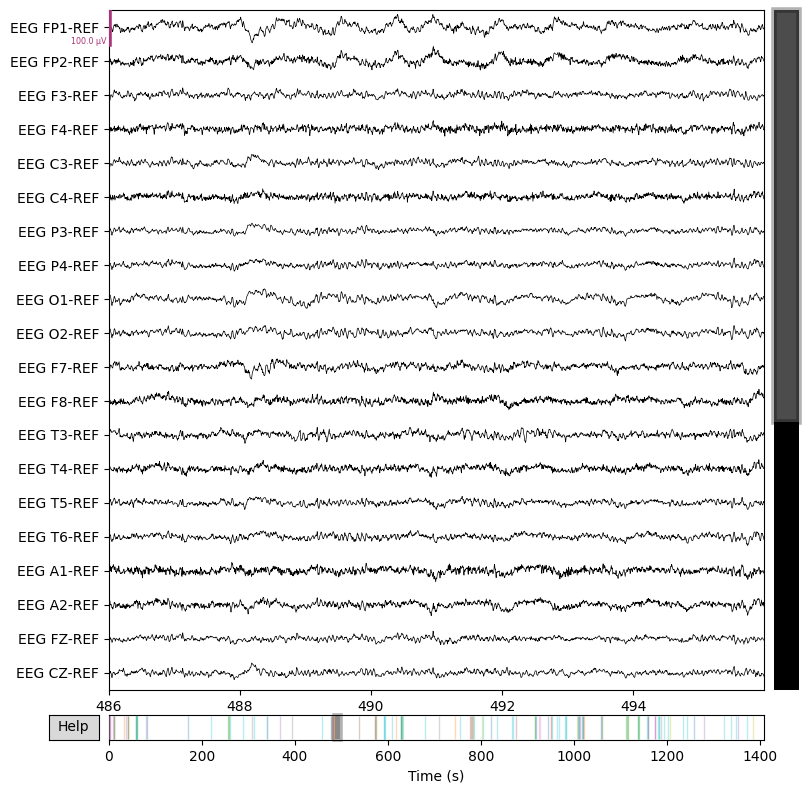

[INFO] Displayed 117 IED annotations
[INFO] IED events are marked on the plot above


In [ ]:
# ==============================================================================
# Visualization of Detected IEDs
# ==============================================================================

# Use inline plotting instead of tk (which requires tkinter)
%matplotlib inline

# Plot a static view of the data with IED annotations
fig = cleaned_raw_data.plot(
    start=486,
    duration=10, 
#    n_channels=22,
    scalings=dict(eeg=50e-6),  # Adjust scalings as needed (e.g., 50 uV)
    title="Detected IEDs on Cleaned EEG Data",
    show=False  # Don't show immediately
)

# Display the plot
import matplotlib.pyplot as plt
plt.show()

print(f"[INFO] Displayed {len(cleaned_raw_data.annotations)} IED annotations")
print("[INFO] IED events are marked on the plot above")

In [ ]:
# ==============================================================================
# Detection Results Report with Ground Truth Comparison
# ==============================================================================

import os

print("=" * 80)
print("DETECTION RESULTS REPORT")
print("=" * 80)

# File information
file_name = os.path.basename(file_path)
print(f"\nAnalyzed File: {file_name}")
print(f"Recording Duration: {times[-1]:.1f} seconds ({times[-1]/60:.2f} minutes)")
print(f"Sampling Rate: {sfreq} Hz")
print(f"EEG Channels: {len(ch_names)}")

# Detection Parameters
print(f"\n{'='*80}")
print("DETECTION PARAMETERS")
print(f"{'='*80}")
print(f"\nFrequency Range: {LOW_FREQ_HZ}-{HIGH_FREQ_HZ} Hz")
print(f"Amplitude Threshold: {AMPLITUDE_SD_THRESH}σ")
print(f"Sharpness Threshold: {SHARPNESS_SD_THRESH}σ")
print(f"Score Threshold: {IED_SCORE_THRESH}")
print(f"Min Concurrent Channels: {MIN_CONCURRENT_CHANNELS}")
print(f"Spatial Time Window: {SPATIAL_CONSISTENCY_WINDOW_S*1000:.0f}ms")
print(f"Merge Window: {MERGE_WINDOW_S*1000:.0f}ms")

# Detection Summary
print(f"\n{'='*80}")
print("DETECTION SUMMARY")
print(f"{'='*80}")

if 'merged_events' in globals() and len(merged_events) > 0:
    print(f"\nTotal Detected Events: {len(merged_events)}")
    print(f"Detection Rate: {len(merged_events) / (times[-1]/60):.2f} events/minute")
    
    # Statistics
    valid_durations = [e['avg_duration_ms'] for e in merged_events if e['avg_duration_ms'] > 0]
    concurrent_counts = [e['max_concurrent_channels'] for e in merged_events]
    scores = [e['max_score'] for e in merged_events]
    
    if valid_durations:
        print(f"\nSpike Duration: Mean={np.mean(valid_durations):.1f}ms, "
              f"SD={np.std(valid_durations):.1f}ms, "
              f"Range=[{np.min(valid_durations):.1f}-{np.max(valid_durations):.1f}]ms")
    
    print(f"Concurrent Channels: Mean={np.mean(concurrent_counts):.1f}, "
          f"SD={np.std(concurrent_counts):.1f}, "
          f"Range=[{np.min(concurrent_counts)}-{np.max(concurrent_counts)}]")
    
    print(f"Detection Score: Mean={np.mean(scores):.1f}, Range=[{np.min(scores)}-{np.max(scores)}]")
    
    # Detected events table
    print(f"\n{'='*80}")
    print(f"DETECTED EVENTS ({len(merged_events)} events)")
    print(f"{'='*80}")
    print(f"\n{'#':<4} {'Time (s)':<12} {'Duration':<14} {'Dur(ms)':<9} {'Score':<6} {'Channels'}")
    print(f"{'-'*4} {'-'*12} {'-'*14} {'-'*9} {'-'*6} {'-'*8}")
    
    for i, ev in enumerate(merged_events):
        onset = ev['onset']
        duration = ev['duration']
        end = onset + duration
        dur_ms = ev.get('avg_duration_ms', 0)
        score = ev.get('max_score', 0)
        n_chan = ev.get('max_concurrent_channels', 0)
        
        print(f"{i+1:<4} {onset:<12.2f} {onset:.2f}-{end:.2f}  {dur_ms:<9.1f} {score:<6} {n_chan}")
else:
    print("\n⚠ No events detected")

# Ground Truth Comparison (NO MERGING)
print(f"\n{'='*80}")
print("GROUND TRUTH COMPARISON")
print(f"{'='*80}")

rec_path = file_path.replace('.edf', '.rec')

if os.path.exists(rec_path):
    # Load ground truth WITHOUT merging
    annotations_gt = []
    with open(rec_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) == 4:
                try:
                    channel = int(parts[0])
                    start_time = float(parts[1])
                    end_time = float(parts[2])
                    event_type = int(parts[3])
                    if event_type in [1, 2, 3, 5, 6]:
                        annotations_gt.append((channel, start_time, end_time, event_type))
                except:
                    continue
    
    print(f"\nGround Truth File: {os.path.basename(rec_path)}")
    print(f"Total Annotations: {len(annotations_gt)} (raw, not merged)")
    
    if annotations_gt:
        # Group by time to show unique events
        time_groups = {}
        for ch, start, end, etype in annotations_gt:
            time_key = (start, end)
            if time_key not in time_groups:
                time_groups[time_key] = []
            time_groups[time_key].append((ch, etype))
        
        print(f"Unique Time Events: {len(time_groups)}")
        
        # Event type statistics
        event_types = [e[3] for e in annotations_gt]
        type_names = {1: 'SPSW', 2: 'PLED', 3: 'GPD', 5: 'Artifact', 6: 'Other'}
        print(f"\nEvent Type Distribution:")
        for etype in sorted(set(event_types)):
            count = event_types.count(etype)
            print(f"  Type {etype} ({type_names.get(etype, 'Unknown')}): {count}")
        
        # Display ground truth events (grouped by time)
        print(f"\n{'='*80}")
        print(f"GROUND TRUTH EVENTS ({len(time_groups)} unique time events)")
        print(f"{'='*80}")
        print(f"\n{'#':<4} {'Time Range (s)':<20} {'Duration':<10} {'Channels':<30} {'Type'}")
        print(f"{'-'*4} {'-'*20} {'-'*10} {'-'*30} {'-'*10}")
        
        sorted_events = sorted(time_groups.items(), key=lambda x: x[0][0])
        for i, ((start, end), channels) in enumerate(sorted_events):
            duration = end - start
            ch_list = sorted([ch for ch, _ in channels])
            ch_str = ','.join(map(str, ch_list[:5]))
            if len(ch_list) > 5:
                ch_str += f',... ({len(ch_list)} total)'
            etype = channels[0][1]
            type_name = type_names.get(etype, 'Unknown')
            
            print(f"{i+1:<4} {start:.2f}-{end:.2f}      {duration:<10.2f} {ch_str:<30} {type_name}")
    
    # Performance Metrics
    if annotations_gt and 'merged_events' in globals() and len(merged_events) > 0:
        print(f"\n{'='*80}")
        print("PERFORMANCE METRICS")
        print(f"{'='*80}")
        
        # Match detections to ground truth events (by time, not individual annotations)
        matched_gt_times = set()
        matched_det = set()
        tolerance = 1.0  # 1 second tolerance
        matches = []
        
        for i, event in enumerate(merged_events):
            det_time = event['peak_time']
            for (start, end), channels in time_groups.items():
                time_key = (start, end)
                if time_key in matched_gt_times:
                    continue
                gt_center = (start + end) / 2
                time_diff = abs(det_time - gt_center)
                
                if time_diff <= tolerance:
                    matched_gt_times.add(time_key)
                    matched_det.add(i)
                    matches.append((i, start, end, time_diff, len(channels)))
                    break
        
        # Calculate metrics
        TP = len(matched_gt_times)
        FP = len(merged_events) - TP
        FN = len(time_groups) - TP
        
        sensitivity = (TP / len(time_groups) * 100) if len(time_groups) > 0 else 0
        precision = (TP / len(merged_events) * 100) if len(merged_events) > 0 else 0
        f1 = (2 * precision * sensitivity / (precision + sensitivity)) if (precision + sensitivity) > 0 else 0
        
        # Display results
        print(f"\nMatching Tolerance: {tolerance}s")
        print(f"Ground Truth Events (unique times): {len(time_groups)}")
        print(f"Ground Truth Annotations (total): {len(annotations_gt)}")
        print(f"\nConfusion Matrix:")
        print(f"  True Positives (TP):   {TP:3d}  (Correctly detected GT events)")
        print(f"  False Positives (FP):  {FP:3d}  (Detections without GT match)")
        print(f"  False Negatives (FN):  {FN:3d}  (Missed GT events)")
        
        print(f"\nPerformance Metrics:")
        print(f"  Sensitivity (Recall):  {sensitivity:6.2f}%  = TP / (TP + FN)")
        print(f"  Precision (PPV):       {precision:6.2f}%  = TP / (TP + FP)")
        print(f"  F1 Score:              {f1:6.2f}%  = Harmonic mean")
        
        # Matched events
        if matches:
            print(f"\n{'='*80}")
            print(f"MATCHED EVENTS ({len(matches)} matches)")
            print(f"{'='*80}")
            print(f"\n{'Det#':<6} {'Det Time':<12} {'GT Range':<20} {'Time Diff':<12} {'GT Channels'}")
            print(f"{'-'*6} {'-'*12} {'-'*20} {'-'*12} {'-'*12}")
            
            for det_idx, gt_start, gt_end, time_diff, n_channels in matches:
                det_time = merged_events[det_idx]['peak_time']
                print(f"{det_idx+1:<6} {det_time:<12.2f} {gt_start:.2f}-{gt_end:.2f}      "
                      f"{time_diff:<12.3f} {n_channels}")
        
        # False Positives
        if FP > 0:
            unmatched_det = [i for i in range(len(merged_events)) if i not in matched_det]
            print(f"\n{'='*80}")
            print(f"FALSE POSITIVES ({FP} events)")
            print(f"{'='*80}")
            print(f"\n{'Det#':<6} {'Time (s)':<12} {'Score':<7} {'Channels'}")
            print(f"{'-'*6} {'-'*12} {'-'*7} {'-'*8}")
            
            for idx in unmatched_det:
                ev = merged_events[idx]
                print(f"{idx+1:<6} {ev['peak_time']:<12.2f} "
                      f"{ev.get('max_score', 0):<7} {ev.get('max_concurrent_channels', 0)}")
        
        # False Negatives
        if FN > 0:
            matched_times_list = list(matched_gt_times)
            unmatched_gt_times = [(start, end) for (start, end) in time_groups.keys() 
                                  if (start, end) not in matched_gt_times]
            
            print(f"\n{'='*80}")
            print(f"FALSE NEGATIVES ({FN} missed events)")
            print(f"{'='*80}")
            print(f"\n{'GT#':<6} {'Time Range (s)':<20} {'Center (s)':<12} {'Channels'}")
            print(f"{'-'*6} {'-'*20} {'-'*12} {'-'*10}")
            
            for idx, (gt_start, gt_end) in enumerate(sorted(unmatched_gt_times)):
                center = (gt_start + gt_end) / 2
                n_channels = len(time_groups[(gt_start, gt_end)])
                print(f"{idx+1:<6} {gt_start:.2f}-{gt_end:.2f}      {center:<12.2f} {n_channels}")
    
    elif not annotations_gt:
        print("\n[INFO] No ground truth annotations in file")
    
    elif 'merged_events' not in globals() or len(merged_events) == 0:
        print(f"\n[WARNING] No detections - all {len(time_groups)} GT events are False Negatives")
        print(f"Sensitivity: 0.00%")

else:
    print(f"\n[WARNING] Ground truth file not found: {rec_path}")

print(f"\n{'='*80}")
print("END OF REPORT")
print(f"{'='*80}")


DETECTION RESULTS REPORT

Analyzed File: spsw_005_a_.edf
Recording Duration: 1408.0 seconds (23.47 minutes)
Sampling Rate: 250.0 Hz
EEG Channels: 32

DETECTION PARAMETERS

Frequency Range: 0.5-60.0 Hz
Amplitude Threshold: 1.8σ
Sharpness Threshold: 0.5σ
Score Threshold: 3
Min Concurrent Channels: 4
Spatial Time Window: 20ms
Merge Window: 500ms

DETECTION SUMMARY

Total Detected Events: 117
Detection Rate: 4.99 events/minute

Spike Duration: Mean=32.7ms, SD=14.1ms, Range=[20.1-69.3]ms
Concurrent Channels: Mean=8.4, SD=8.9, Range=[0-32]
Detection Score: Mean=3.4, Range=[3-5]

DETECTED EVENTS (117 events)

#    Time (s)     Duration       Dur(ms)   Score  Channels
---- ------------ -------------- --------- ------ --------
1    -0.05        -0.05-0.54  39.2      4      32
2    0.52         0.52-1.11  0.0       3      21
3    1.03         1.03-1.62  0.0       3      18
4    1.55         1.55-2.11  0.0       3      6
5    9.71         9.71-10.29  0.0       3      19
6    10.21        10.21-10